# Investigate Regression Output
After running EBUS-Extraction to pull out the given upwelling system, I ran the climate-correlation.py script to correlate a near-offshore region of the EBUS with specific climate indices. This saves some CSV files with regression results that will now be interpreted here.

In [11]:
# Numerics
import numpy as np
import pandas as pd
import xarray as xr

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/processed/CCS/'
df_enso = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_enso')
df_pdo = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_pdo')
df_npo = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_npo')

In [13]:
pdo = np.asarray(df_pdo['R Value'])
enso = np.asarray(df_enso['R Value'])
npo = np.asarray(df_npo['R Value'])

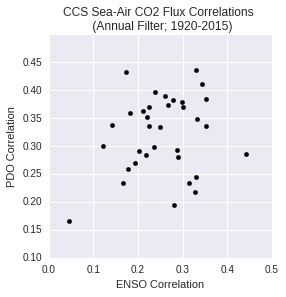

In [32]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
plt.scatter(enso, pdo, color='k')
plt.xlabel('ENSO Correlation')
plt.ylabel('PDO Correlation')
plt.title('CCS Sea-Air CO2 Flux Correlations \n (Annual Filter; 1920-2015)')
plt.yticks(np.arange(0.10, 0.5, 0.05))